<a href="https://colab.research.google.com/github/SithmiDesilva/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Analysis**

1.1 **Importing Libraries**

In [ ]:
##Import dependencies
import numpy as np  #for computational calculations
import pandas as pd   # for manipulate dataframes
from sklearn.model_selection import train_test_split  # split the dataset into test train data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # evaluate the models
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization
import pickle
from sklearn.model_selection import learning_curve



1.2 **Load the Dataset**

In [ ]:
##Loading the dataset
heart_data=pd.read_csv("/content/drive/MyDrive/Projects/Heart Disease Prediction/heart.csv")

# **2. Data Cleaning**

2.1 **Find missing values**

In [ ]:
# Finding missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


2.2 **Find duplicate values**

In [ ]:
# finding duplicate values
heart_data.duplicated().sum()

723

2.3 **Handle duplicate values**

In [ ]:
#Removing all the duplicated values
heart_data=heart_data.drop_duplicates()

# 3. **Feature Engineering**

3.1 **Check Data Imbalance**

In [ ]:
# Checking the distribution of target variablas
heart_data["target"].value_counts() ##"value_counts" gives the count of 1 and 0s

,count
target,
1,164
0,138


<Axes: xlabel='target'>

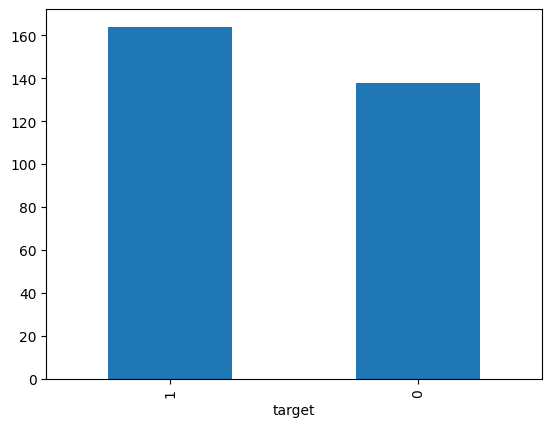

In [ ]:
#Graph representation for distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns
heart_data['target'].value_counts().plot(kind='bar')

In [ ]:
from imblearn.over_sampling import SMOTE
# Handle class imbalance using SMOTE
X = heart_data.drop(columns=['target'])
y = heart_data['target']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
target
0    164
1    164
Name: count, dtype: int64


<Axes: xlabel='target'>

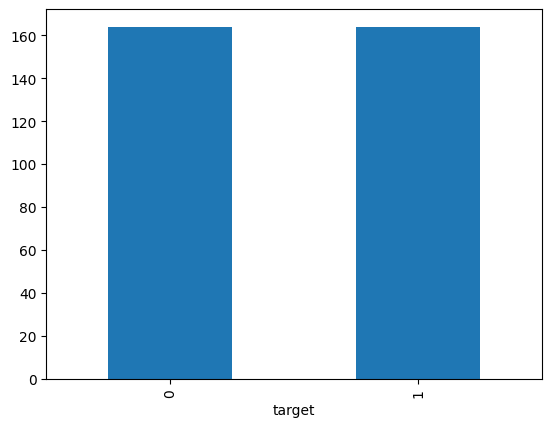

In [ ]:
#Balanced target variable
pd.Series(y_resampled).value_counts().plot(kind='bar')

3.2 **Correlation Analysis**

In [ ]:
#Correlation Analysis
print("\nCorrelation Analysis:")
correlation_matrix = heart_data.corr()
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print(correlation_with_target)


Correlation Analysis:
target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


In [ ]:
#splitting the data (defining the X and Y variables)
X=heart_data.drop(columns='target',axis=1)
Y=heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0    

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64


In [ ]:
#splitting the data into training data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,stratify=y_resampled,random_state=2)
# Change stratify to y_resampled

In [ ]:
print(X.shape,X_train.shape,X_test.shape)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

(302, 13) (262, 13) (66, 13)
Training set size: 262
Test set size: 66


In [ ]:
# Save feature names before scaling (to maintain correct order)
feature_names = X_train.columns.tolist()
print(feature_names)
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
from sklearn.preprocessing import StandardScaler
# Standard scaling
scaler = StandardScaler()
# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Save the scaler to use during predictions
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Data preprocessing completed.")

Data preprocessing completed.


In [ ]:
#### Model Training
##Logistic Regression Model

#Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

model=LogisticRegression(C=0.1, penalty='l2')

In [ ]:
##Training the logisticRegression model using training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [ ]:
#Model evaluation
##Accuracy score

In [ ]:
#cross validation for training data
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,Y_train,cv=10)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
###Accuracy on the training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.8625954198473282


In [ ]:
###Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on testing data:',test_data_accuracy)

Accuracy on testing data: 0.8333333333333334


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score  # evaluate the models # Added classification_report and roc_auc_score
#Clarification report
print(classification_report(Y_test,X_test_prediction))
print('\nROC_AUC_Curve:',roc_auc_score(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.82      0.85      0.84        33

    accuracy                           0.83        66
   macro avg       0.83      0.83      0.83        66
weighted avg       0.83      0.83      0.83        66


ROC_AUC_Curve: 0.8333333333333334


In [ ]:
# Save the trained logistic regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)  # Change 'logistic_regression_model' to 'model'

print("\n Logistic Regression model saved as 'logistic_regression_model.pkl'.")


 Logistic Regression model saved as 'logistic_regression_model.pkl'.


If the accuracy of training data is large and accuracy of the testing data is small it is overfitted.

In [ ]:
#Train Random Forest MOdel
from sklearn.ensemble import RandomForestClassifier

# Load saved feature names
with open('feature_names.pkl', 'rb') as file:
    feature_names = pickle.load(file)

#Building the model
randomforest_classifier=RandomForestClassifier(n_estimators=100)
score=cross_val_score(randomforest_classifier,X_resampled,y_resampled,cv=10)

print(score)

[0.75757576 0.81818182 0.84848485 0.75757576 0.90909091 0.81818182
 0.75757576 0.78787879 0.84375    0.84375   ]


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,150,200], 'max_depth':[10,20,30,40]
}

grid_search = GridSearchCV(estimator=randomforest_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [50, 100, 150, 200]})

In [ ]:
#Accuracy of the training data
randomforest_classifier.fit(X_resampled,y_resampled)
X_train_prediction_1=randomforest_classifier.predict(X_train)
print('Accuracy of Training data:',accuracy_score(X_train_prediction_1,Y_train))
print('\nClassification Report\n',classification_report(Y_train,X_train_prediction_1))
print('\nROC_AUC_Curve:',roc_auc_score(Y_train,X_train_prediction_1))


Accuracy of Training data: 1.0

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       131

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262


ROC_AUC_Curve: 1.0


In [ ]:
#Accuracy of the testing data
X_test_prediction_1=randomforest_classifier.predict(X_test)
print('Accuracy of the Testing data:',accuracy_score(X_test_prediction_1,Y_test))
print('\nClassification Report\n',classification_report(Y_test,X_test_prediction_1))
print('\nROC_AUC_Curve:',roc_auc_score(Y_test,X_test_prediction_1))


Accuracy of the Testing data: 1.0

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        33

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66


ROC_AUC_Curve: 1.0


In [ ]:
# Save the trained random forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(randomforest_classifier, file)  # Change 'rf_model' to 'randomforest_classifier'

print("\n Random Forest model saved as 'random_forest_model.pkl'.")


 Random Forest model saved as 'random_forest_model.pkl'.


In [ ]:
# Assuming you have already trained your model and made predictions:

# Accuracy on training data
X_train_prediction_1 = randomforest_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_1, Y_train)
print("Accuracy on training data:", training_data_accuracy)

# Accuracy on test data
X_test_prediction_1 = randomforest_classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction_1, Y_test)
print("Accuracy on testing data:", test_data_accuracy)

# Check for a significant difference
if training_data_accuracy - test_data_accuracy > 0.1:  # Example threshold
    print("Potential overfitting detected!")

Accuracy on training data: 1.0
Accuracy on testing data: 1.0


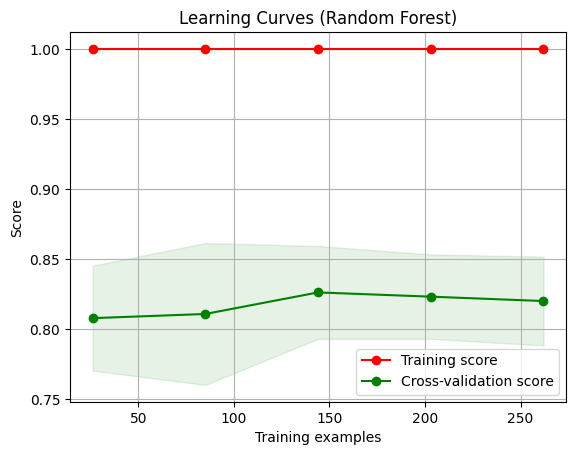

In [ ]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



# Assuming you have X_resampled, y_resampled, and randomforest_classifier defined
title = "Learning Curves (Random Forest)"
cv = 5  # Number of cross-validation folds
plot_learning_curve(randomforest_classifier, title, X_resampled, y_resampled, cv=cv, n_jobs=-1)
plt.show()

In [ ]:
import numpy as np
import pickle

# Save the trained random forest model
with open('random_forest_model.pkl', 'rb') as file:
    randomforest_classifier = pickle.load(file)



# Load the scaler
with open("scaler.pkl", "rb") as file:
    scaler = pickle.load(file)

# Function to take user input
def get_user_input():
    print("\nEnter the patient details below:\n")

    age = int(input("Age: "))
    sex = int(input("Sex (0 = Female, 1 = Male): "))
    cp = int(input("Chest Pain Type (0-3): "))
    trestbps = int(input("Resting Blood Pressure (mm Hg): "))
    chol = int(input("Serum Cholesterol (mg/dL): "))
    fbs = int(input("Fasting Blood Sugar > 120 mg/dL (0 = No, 1 = Yes): "))
    restecg = int(input("Resting ECG (0-2): "))
    thalach = int(input("Max Heart Rate Achieved: "))
    exang = int(input("Exercise-Induced Angina (0 = No, 1 = Yes): "))
    oldpeak = float(input("ST Depression Induced by Exercise: "))
    slope = int(input("Slope of Peak Exercise ST Segment (0-2): "))
    ca = int(input("Number of Major Vessels (0-3): "))
    thal = int(input("Thalassemia Type (0-3): "))

    # Convert inputs into a NumPy array
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    return input_data

# Get user input
input_data = get_user_input()

# Scale input data
input_data_scaled = scaler.transform(input_data)

# Fit the model before making predictions - this is the crucial step that was missing
randomforest_classifier.fit(X_train, Y_train) # Assuming you have X_train and Y_train loaded

# Make prediction
prediction = randomforest_classifier.predict(input_data_scaled)[0]

# Display result
print("\nPrediction Result:")
if prediction == 1:
    print("✅ The patient is unlikely to have heart disease.")
else:
    print("🚨The patient is likely to have heart disease.")  #1depicts as 0


Enter the patient details below:

